# Water Potability

## Q1. Import csv file and perform exploratory data analysis by identifying size of the datasets, column information and null values.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### A. Read CSV file

In [3]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### B. identifying size of the datasets

In [4]:
df.size

32760

### C. identifying columns Information of the datasets

In [5]:
print(df.columns)

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


### D. identifying null values of the datasets

In [6]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


## Q2. Identify column wise missing values in the dataset and replace them with mean values of the respective column.

### A. Before identify

In [7]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


### B. Fill with mean

In [8]:
df.fillna(df.mean(numeric_only=True), inplace=True)

### C. After identify

In [9]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


## Q3. Perform co-relation analysis for the given columns and generate co-relation matrix for the same.

### A. Generate Correlation Matrix

In [10]:
corr_matrix = df.corr()

print(corr_matrix)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        

### B. Heatmap of Correlation Matrix

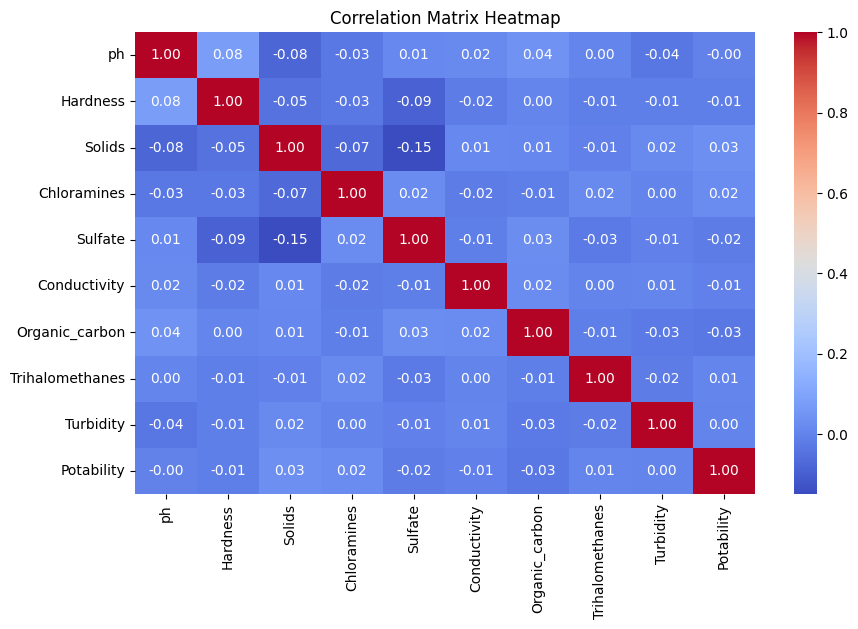

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


## Q4. Implement Naive Bayes Classifier to predict Water Potability.

✅ Accuracy: 0.6112804878048781

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       400
           1       0.51      0.18      0.27       256

    accuracy                           0.61       656
   macro avg       0.57      0.53      0.50       656
weighted avg       0.58      0.61      0.55       656


✅ Confusion Matrix:
 [[354  46]
 [209  47]]


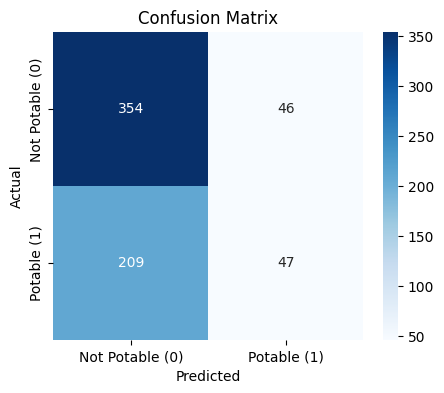

In [12]:
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5: Train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = nb.predict(X_test)

# Step 7: Evaluate performance
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Potable (0)", "Potable (1)"],
            yticklabels=["Not Potable (0)", "Potable (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()